#How consecutive week day returns correlate?

## Download stock prices for : SNP (spx500), GOOGL (Alphabet Inc.), VWAGY (Volkswagen)

In [ ]:
import pandas as pd
import requests
from datetime import datetime
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pyplot.rcParams['figure.figsize'] = (30, 20)

In [ ]:
class YahooData:
  def fetch(ticker, start, end, frequency, events, include_adj_close = 'true'):
    """
    ticker: <str>
      name of the stock
    start/end: <str>
      interval of dates period in format 'yyyy-mm-dd'
    frequency: <str>
      the step of the table: 1d, 1wk, 1mo
    events: <str>
      what kind of data you need: history/splits/capitalGain/div
    include_adj_close: <str>
      true/false for including adjusted close price
      not bool because you add it as a part of str
    """
    headers ={'User-agent': 'Mozilla/5.0'}

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&events"+str(events) +"&includeAdjustedClose=" + str(include_adj_close)
    
    r = requests.get(url, headers=headers)
    df = pd.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return df

In [ ]:
snp = YahooData.fetch("SNP", start="2016-02-21", end="2022-02-21", frequency='1d', events = 'history', include_adj_close = 'true')

In [ ]:
googl = YahooData.fetch("GOOGL", start="2016-02-21", end="2022-02-21", frequency='1d', events = 'history', include_adj_close = 'true')

In [ ]:
vwagy = YahooData.fetch("VWAGY", start="2016-02-21", end="2022-02-21", frequency='1d', events = 'history', include_adj_close = 'true')

## Calculate daily returns 

In [ ]:
def daily_returns(series):
  series['dreturns'] = ((series['Adj Close'].shift(1) - series['Adj Close']) / series['Adj Close']) * 100
  return series

In [ ]:
snp_wd = daily_returns(snp)
googl_wd = daily_returns(googl)
vwagy_wd = daily_returns(vwagy)

In [ ]:
for df in [snp_wd, googl_wd, vwagy_wd]:
  df.dropna(inplace=True)

## General visualisations

In [ ]:
pyplot.rcParams['figure.figsize'] = (20, 10)

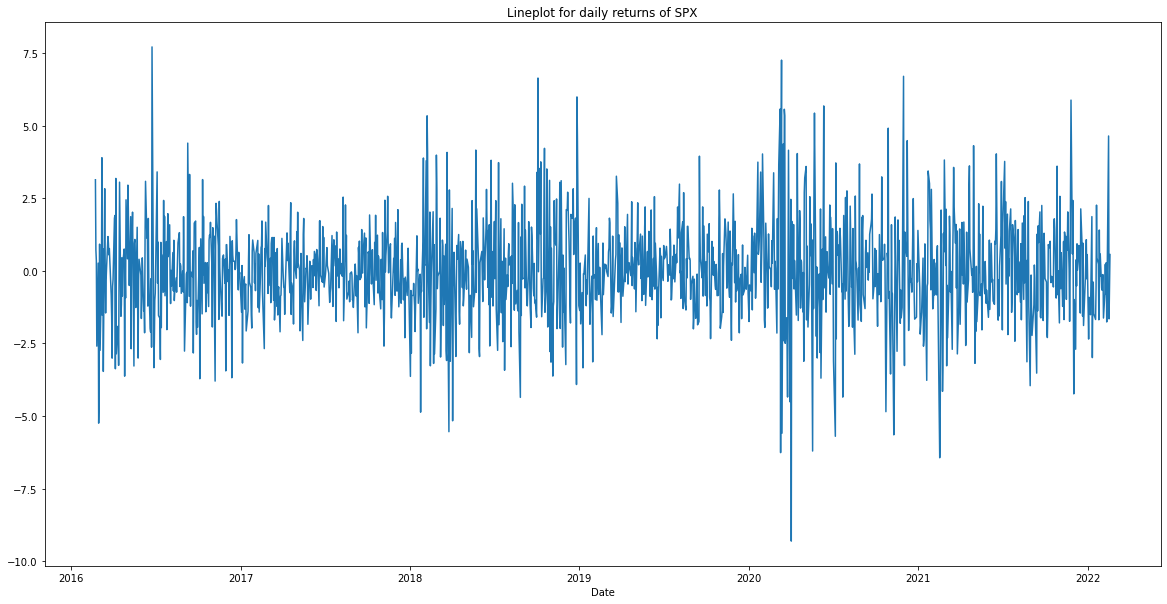

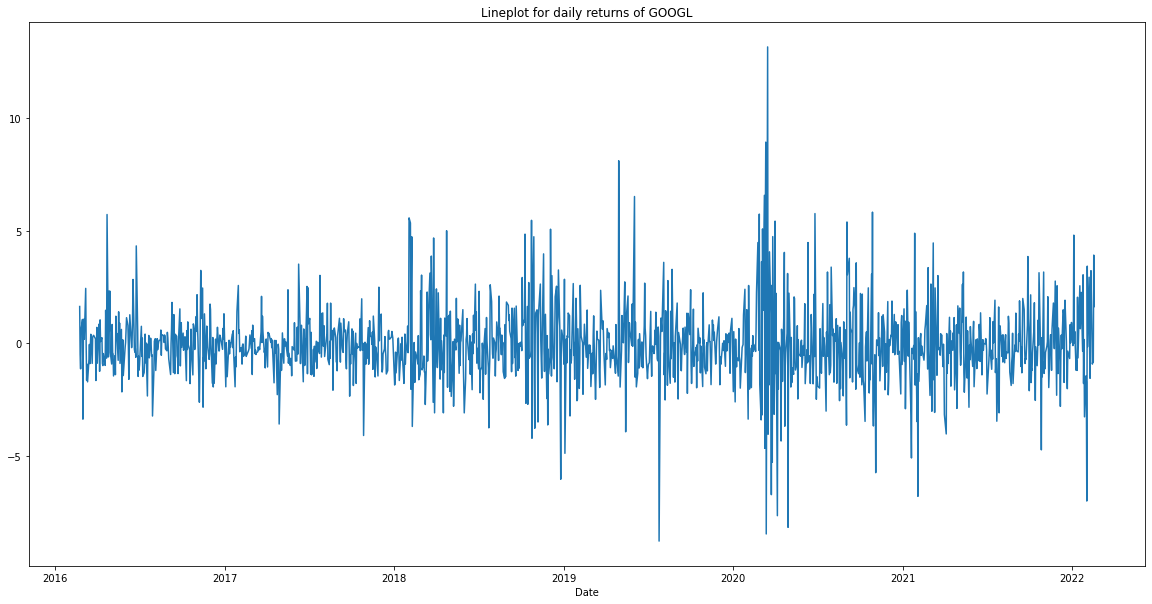

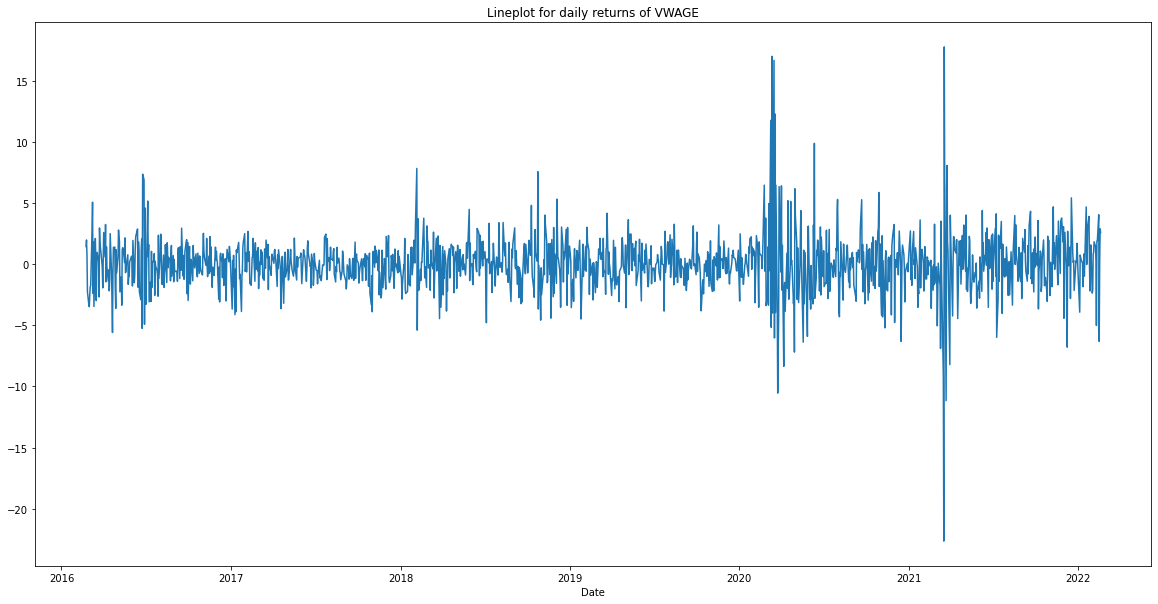

In [ ]:
for df, name in zip([snp_wd, googl_wd, vwagy_wd], ["SPX", "GOOGL", "VWAGE"]):
    plt.title("Lineplot for daily returns of " + name)
    df["dreturns"].plot(subplots=True, figsize=(10,12))
    fig_name = "lineplot_" + name + ".png"
    plt.savefig(fig_name)
    plt.show()

In [ ]:
for df in [snp_wd, googl_wd, vwagy_wd]:
  df["Date"] = pd.to_datetime(df.index, format="%Y-%m-%d")
  df["Weekday"] = df["Date"].dt.day_name()

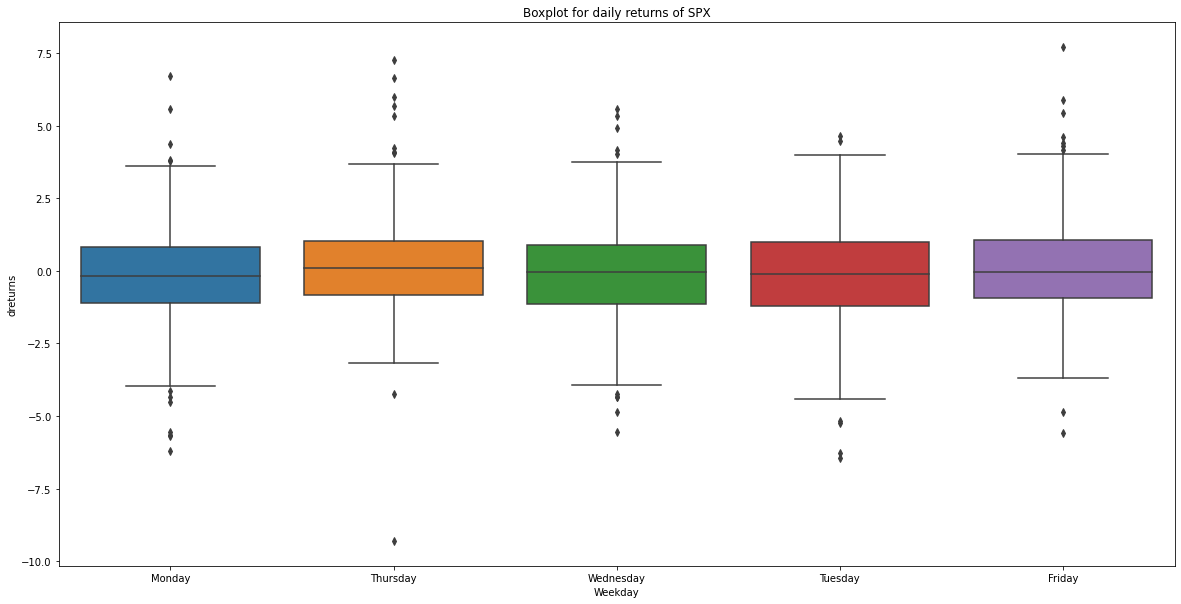

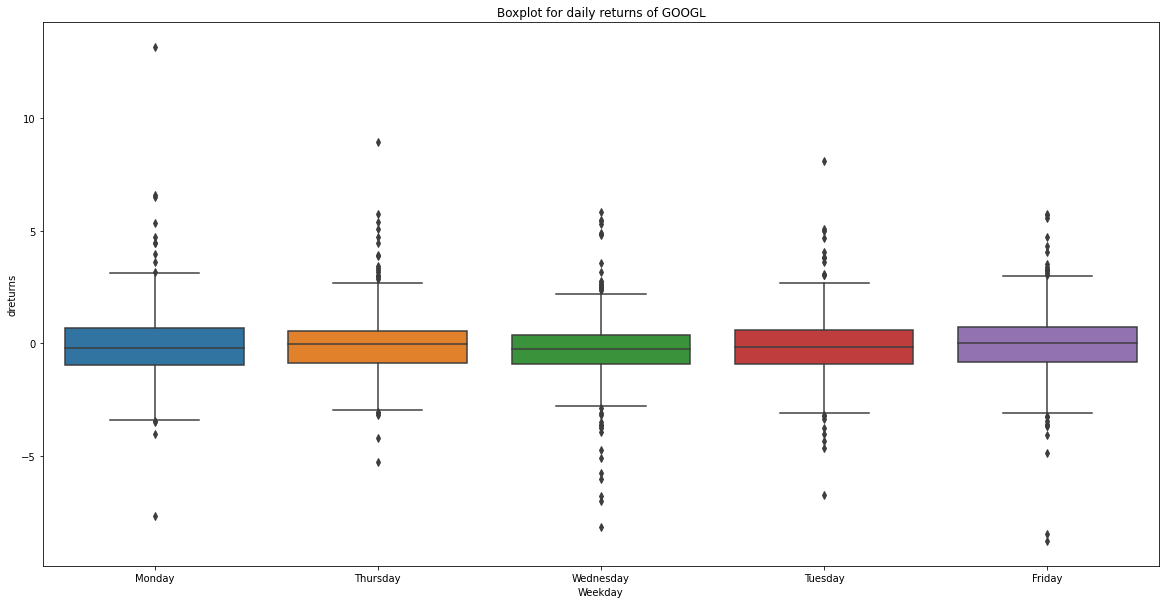

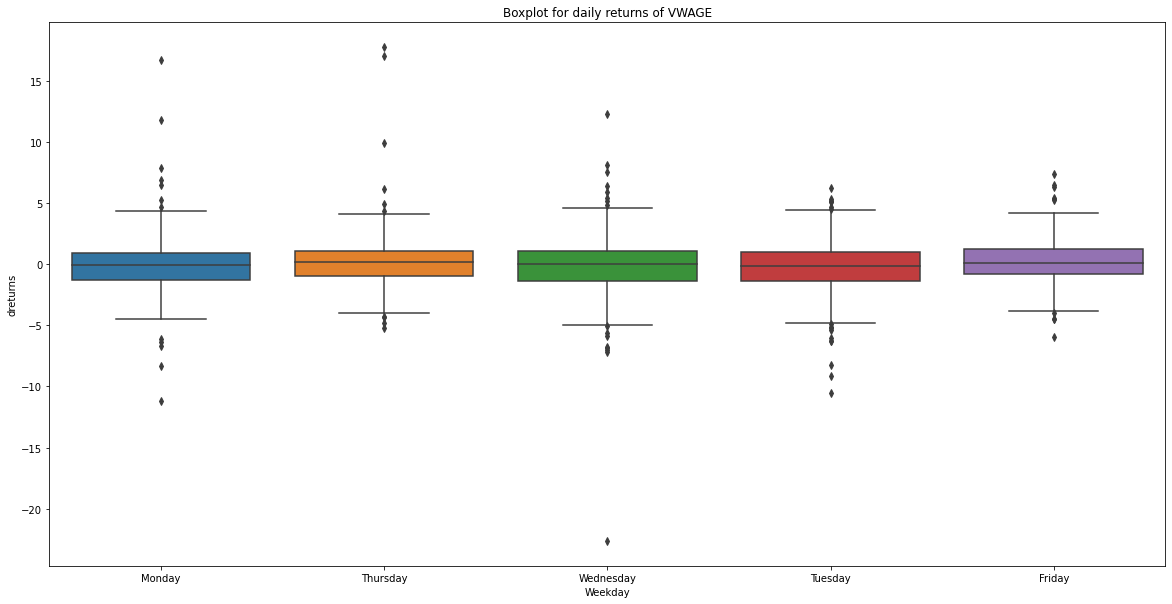

In [ ]:
for df, name in zip([snp_wd, googl_wd, vwagy_wd], ["SPX", "GOOGL", "VWAGE"]):
    plt.title("Boxplot for daily returns of " + name)
    sns.boxplot(data = df, x='Weekday', y="dreturns", order=["Monday", "Thursday", "Wednesday", "Tuesday", "Friday"])
    fig_name = "boxplot_" + name + ".png"
    plt.savefig(fig_name)
    plt.show()

## Plot ACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# set the comfortable parameters for graphs display
pyplot.rcParams['figure.figsize'] = (20, 10)

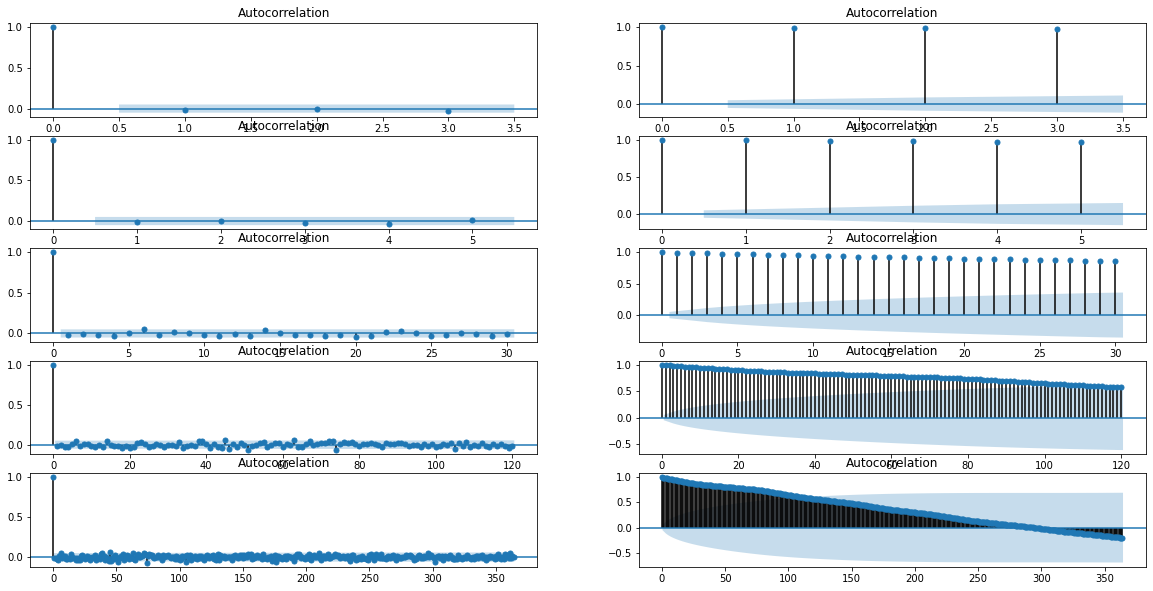

In [ ]:
# plot the picture of the ACF coefficent distribution
lags = [3, 5, 30, 120, 364]
fig, ax = pyplot.subplots(5, 2)
for idx, lag in enumerate(lags):
  plot_acf(snp_wd["dreturns"], lags=lag, ax=ax[idx][0])
for idx, lag in enumerate(lags):
  plot_acf(snp_wd["Adj Close"], lags=lag, ax=ax[idx][1]) 
pyplot.show()

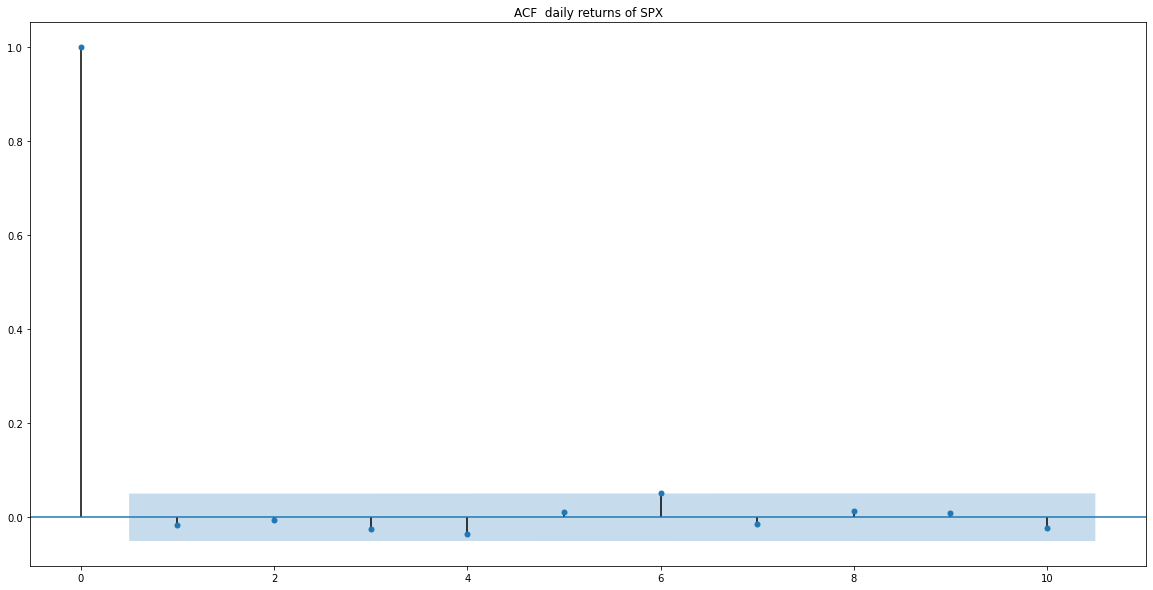

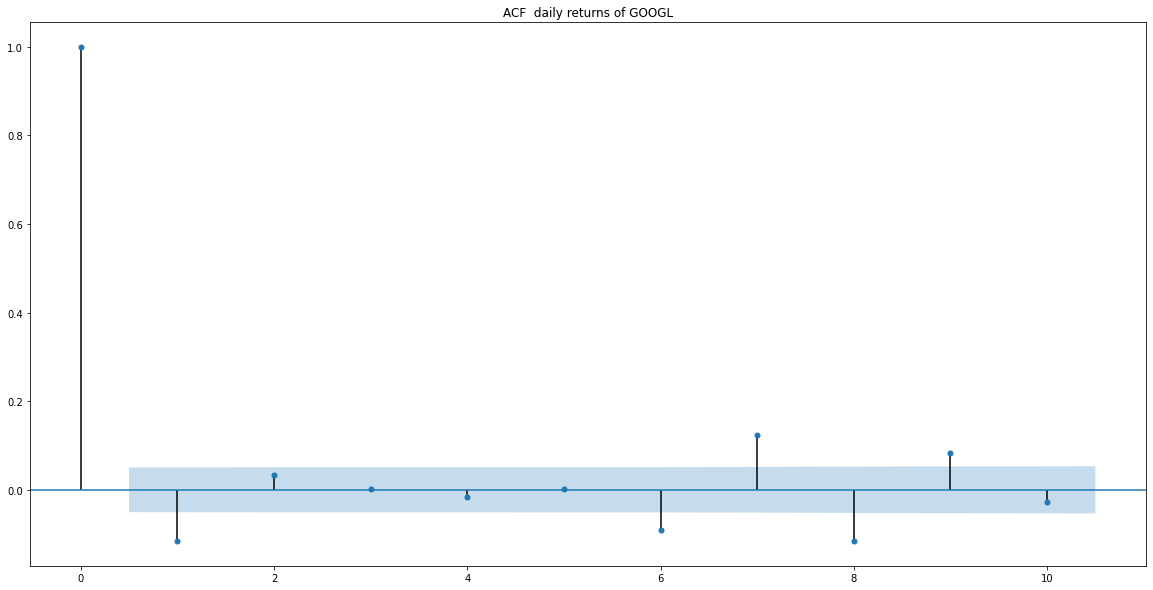

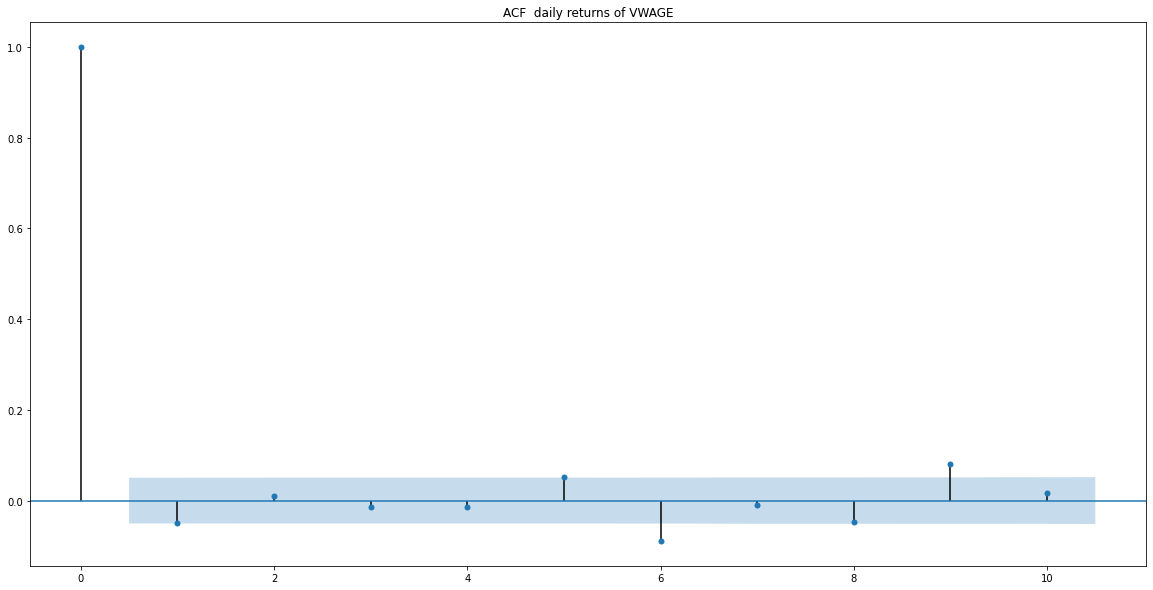

In [ ]:
for df, name in zip([snp_wd, googl_wd, vwagy_wd], ["SPX", "GOOGL", "VWAGE"]):
    title = "ACF  daily returns of " + name
    # fig_name = "acf_" + name + ".png"
    plot_acf(df["dreturns"], lags=10, title=title)
    # plt.savefig(fig_name)
    plt.show()

## Check Statonarity with Dickey Fuller test

>Dickey-Fuller test checks the series stationarity condition.
H0: g = 0 (the series is not stationar).
It means that its characteristics are not constant and stable in time

>If the p-value is greater than alpha (p > . 05), then we fail to reject the null hypothesis, and we say that the result is statistically nonsignificant

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
for df in [snp_wd, googl_wd, vwagy_wd]:
  df.dropna(inplace=True)

In [ ]:
print('ADF Test: SNP returns time series')
adf_test(snp_wd['dreturns'])
print('ADF Test: GOOGL time series')
adf_test(googl_wd['dreturns'])
print('ADF Test: VWAGE time series')
adf_test(vwagy_wd['dreturns'])

ADF Test: SNP returns time series
ADF Statistics: -39.520300
p-value: 0.000000
Critical values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
ADF Test: GOOGL time series
ADF Statistics: -12.929490
p-value: 0.000000
Critical values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
ADF Test: VWAGE time series
ADF Statistics: -12.244077
p-value: 0.000000
Critical values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


## Calculate the autocorrelation coefficients

In [ ]:
import statsmodels.api as sm

In [ ]:
#statsmodels version
from statsmodels.tsa.stattools import acf as stats_acf
def auto_acf(x, n):
    return stats_acf(x, nlags=n)

In [ ]:
# code for the formula
def get_auto_corr(x,n):
  T = x.count()
  tau = n
  coef = 1 / (T - tau)
  med = np.mean(x)
  res = 0
  for i in range(T - tau):
    yt = x[i]
    yttau = x[i+tau]
    res += (yt - med) * (yttau - med)
  res *= coef
  res /= np.var(x)
  return res
get_auto_corr(snp_wd['dreturns'], n = 10)

-0.022210527592553268

In [ ]:
print(get_auto_corr(snp_wd['dreturns'], n = 1))
print(get_auto_corr(googl_wd['dreturns'], n = 1))
print(get_auto_corr(vwagy_wd['dreturns'], n = 1))

-0.016476453747222918
-0.11591318195224388
-0.04933724227342375


In [ ]:
auto_acf(snp_wd['dreturns'], n = 10)
auto_acf(googl_wd['dreturns'], n = 10)
auto_acf(vwagy_wd['dreturns'], n = 10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        , -0.04930459,  0.01111697, -0.01522183, -0.01343766,
        0.051669  , -0.08929724, -0.01018194, -0.04818089,  0.08004815,
        0.01679519])